In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Package for make statistics
import statsmodels.api as sm

# Package for import financial data
import yfinance as yf
from yahoofinancials import YahooFinancials

## Question 11 
**Download 5 daily stock returns. Using an AR model compute the best forecast at 1 day and at 5 days. Discuss the number of lags used. Discuss stationarity**.

The formule of log return : $$ \Delta p_{t} = \log(p_{t}) - \log(p_{t-1})$$

In [3]:
carrefour_df = yf.download('CA.PA', 
                      start='2019-01-01', 
                      end='2019-03-01', 
                      progress=False)

carrefour = pd.DataFrame(carrefour_df)

# We use the the method .pct_change() in order to transform to returns
carrefour = carrefour["Close"].pct_change()
carrefour = np.log(1 + carrefour)
carrefour = carrefour.dropna()
carrefour = carrefour.reset_index(drop=True)

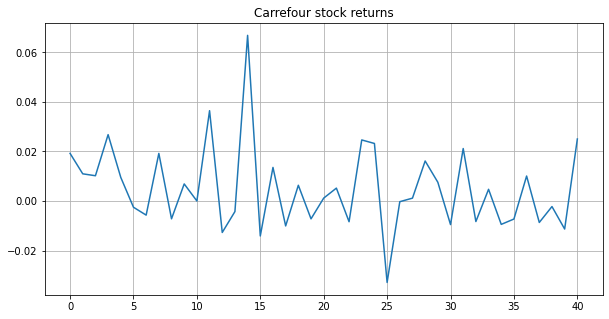

In [4]:
plt.figure(figsize=(10,5))
plt.plot(carrefour)
plt.title("Carrefour stock returns")
plt.grid(True)

In [5]:
# We import class for time series analysis from the package statsmodels
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

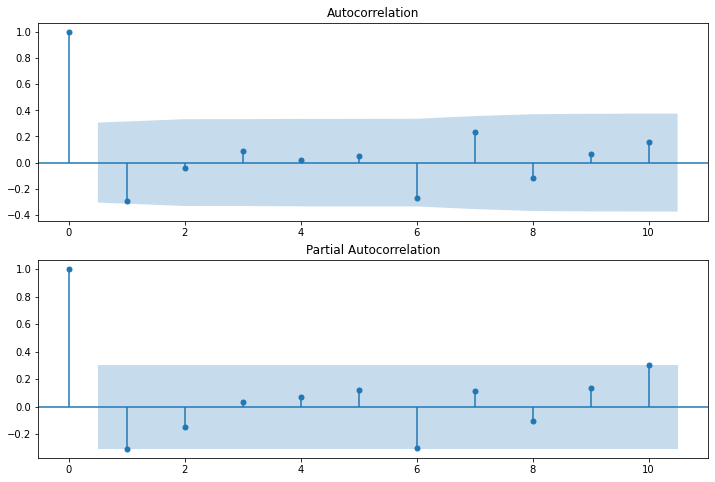

In [6]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(carrefour.values.squeeze(), lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(carrefour, lags=10, ax=ax2)

## Autocorellation functions
An autocorrelation plot is designed to show whether the elements of a time series are positively correlated, negatively correlated, or independent of each other. (The prefix auto means “self”— autocorrelation specifically refers to correlation among the elements of a time series.)

An autocorrelation plot shows the value of the autocorrelation function (acf) on the vertical axis. It can range from –1 to 1.

The *plot_acf* permits to draw the autocorellation function. According to the following graph, it seems that the process follows a random walk because all autocorellations are significanlty different from zero. 

The *plot_pacf* permis to draw the partial autocorrelation function. According to the following graph, the partial autocorrelation function is not significantly different from zero for the 1rst lag and the 6th lag. It would be possible that the best lag for an autoregressive model is p = 1. 

Notice that the autocorrelation for lag = 0 always equals 1 because we compute $\rho(0)/\rho(0) = 1$ in this case.

## The model 

In order to build a time series model for this stock, we need to select the best order lag for the AR model. Generally, we select a model that minimizes the AIC (Aikake information criteria) and BIC metrics. We will estimate several models with differents ascending lags in order to get the best model with the aim of metrics AIC and BIC. **The idea is to get the model thaht will minimize the best AIC and BIC metrics**.

In [7]:
mod = AutoReg(carrefour, 1, old_names=False)
mod = mod.fit()
print(mod.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                   41
Model:                     AutoReg(1)   Log Likelihood                 108.110
Method:               Conditional MLE   S.D. of innovations              0.016
Date:                Tue, 13 Oct 2020   AIC                             -8.093
Time:                        22:19:14   BIC                             -7.967
Sample:                             1   HQIC                            -8.048
                                   41                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      0.003      2.261      0.024       0.001       0.011
Close.L1      -0.3087      0.152     -2.032      0.042      -0.606      -0.011
                                    Roots           

In [8]:
mod = AutoReg(carrefour, 2, old_names=False)
mod = mod.fit()
print(mod.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                   41
Model:                     AutoReg(2)   Log Likelihood                 105.572
Method:               Conditional MLE   S.D. of innovations              0.016
Date:                Tue, 13 Oct 2020   AIC                             -8.047
Time:                        22:19:14   BIC                             -7.876
Sample:                             2   HQIC                            -7.985
                                   41                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0067      0.003      2.358      0.018       0.001       0.012
Close.L1      -0.3657      0.159     -2.295      0.022      -0.678      -0.053
Close.L2      -0.1482      0.160     -0.929      0.3

In [9]:
mod = AutoReg(carrefour, 3, old_names=False)
mod = mod.fit()
print(mod.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                   41
Model:                     AutoReg(3)   Log Likelihood                 102.608
Method:               Conditional MLE   S.D. of innovations              0.016
Date:                Tue, 13 Oct 2020   AIC                             -7.975
Time:                        22:19:14   BIC                             -7.760
Sample:                             3   HQIC                            -7.898
                                   41                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.003      2.036      0.042       0.000       0.012
Close.L1      -0.3730      0.163     -2.290      0.022      -0.692      -0.054
Close.L2      -0.1540      0.172     -0.895      0.3

The best model is the AR(1) according the metrics. Actually, the class *ar_select_order* from the statsmodels package permits to select automatically the best order lag for the model. It would be better to see it our results can be confirmed by this class.

In [10]:
sel = ar_select_order(carrefour, 5, old_names=False)
sel = sel.model.fit()
print(sel.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                   41
Model:                     AutoReg(1)   Log Likelihood                 108.110
Method:               Conditional MLE   S.D. of innovations              0.016
Date:                Tue, 13 Oct 2020   AIC                             -8.093
Time:                        22:19:14   BIC                             -7.967
Sample:                             1   HQIC                            -8.048
                                   41                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0060      0.003      2.261      0.024       0.001       0.011
Close.L1      -0.3087      0.152     -2.032      0.042      -0.606      -0.011
                                    Roots           

It seems that the choice of an AR(1) model is confirmed by the *ar_select_order* function. Let's how the model performs

Text(0.5, 1.0, 'Analysis of forecasted values')

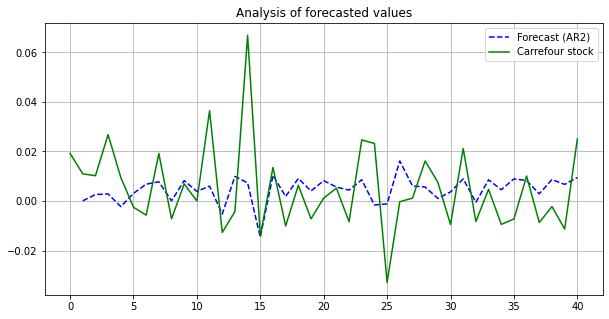

In [11]:
plt.figure(figsize=(10,5))
plt.plot(sel.fittedvalues, "--", label = "Forecast (AR2)", color="blue")
plt.plot(carrefour, label = "Carrefour stock", color="green")
plt.grid(True)
plt.legend()
plt.title("Analysis of forecasted values")

## Question 12
**Download 5 daily prices of the same stock. Using an AR model compute the best forecast at 1 day and at 5 days. Discuss the number of lags used.**

In [12]:
carrefour_df = yf.download('CA.PA', 
                      start='2019-01-01', 
                      end='2019-03-01', 
                      progress=False)

carrefour = pd.DataFrame(carrefour_df)
carrefour = carrefour["Close"]
carrefour = carrefour.reset_index(drop=True)

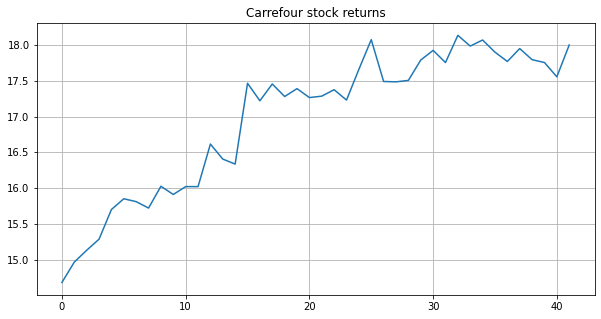

In [13]:
plt.figure(figsize=(10,5))
plt.plot(carrefour)
plt.title("Carrefour stock returns")
plt.grid(True)

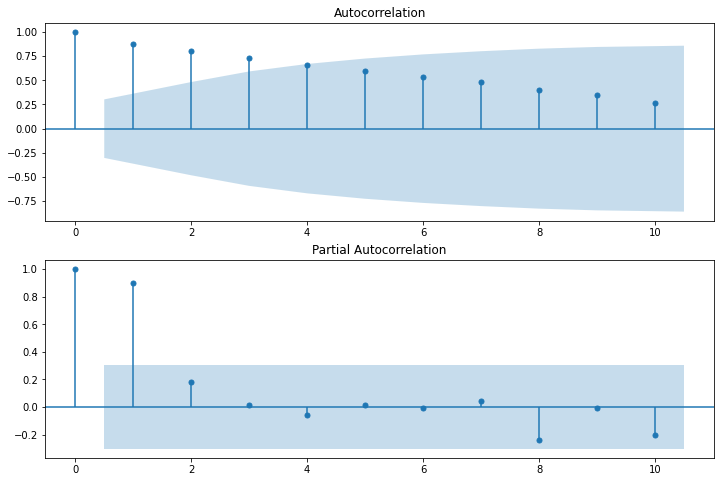

In [14]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(carrefour.values.squeeze(), lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(carrefour, lags=10, ax=ax2)

On the first side we can see that the autocorrelation function decreases slowly the lag 4. On the second side, the partial autocorrelation function indicates a lag 2. Then we can think that it would be 

In [15]:
sel = ar_select_order(carrefour, 3, old_names=False)
sel = sel.model.fit()
print(sel.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                   42
Model:                     AutoReg(2)   Log Likelihood                  -2.333
Method:               Conditional MLE   S.D. of innovations              0.257
Date:                Tue, 13 Oct 2020   AIC                             -2.521
Time:                        22:19:18   BIC                             -2.352
Sample:                             2   HQIC                            -2.460
                                   42                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9300      0.749      2.576      0.010       0.461       3.399
Close.L1       0.5411      0.152      3.561      0.000       0.243       0.839
Close.L2       0.3514      0.142      2.473      0.0

Text(0.5, 1.0, 'Analysis of forecasted values')

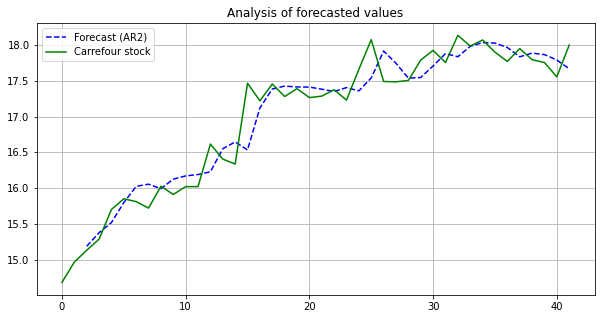

In [16]:
plt.figure(figsize=(10,5))
plt.plot(sel.fittedvalues, "--", label = "Forecast (AR2)", color="blue")
plt.plot(carrefour, label = "Carrefour stock", color="green")
plt.grid(True)
plt.legend()
plt.title("Analysis of forecasted values")

## Question 13
Repeat the two previous exercises with 100 days. Discuss the four cases

In [17]:
carrefour_df = yf.download('CA.PA', 
                      start='2018-01-01', 
                      end='2018-04-01', 
                      progress=False)

carrefour = pd.DataFrame(carrefour_df)

# We use the the method .pct_change() in order to transform to returns
carrefour = carrefour["Close"].pct_change()
carrefour = np.log(1 + carrefour)
carrefour = carrefour.dropna()
carrefour = carrefour.reset_index(drop=True)

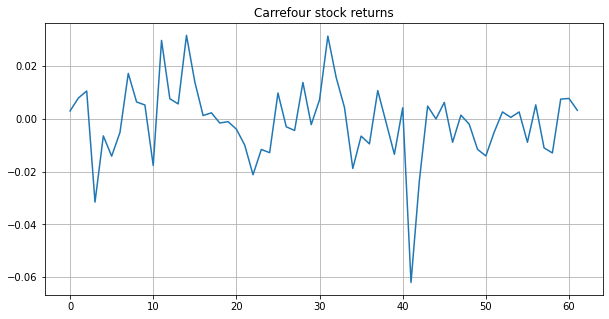

In [18]:
plt.figure(figsize=(10,5))
plt.plot(carrefour)
plt.title("Carrefour stock returns")
plt.grid(True)

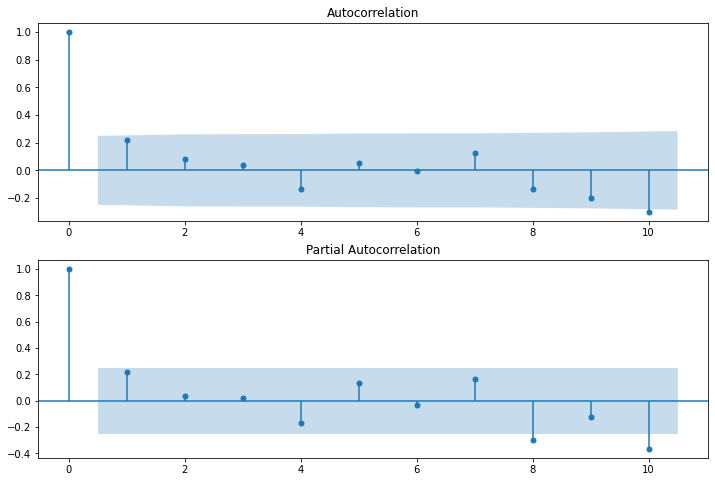

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(carrefour.values.squeeze(), lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(carrefour, lags=10, ax=ax2)

In [20]:
sel = ar_select_order(carrefour, 10, old_names=False)
sel = sel.model.fit()
print(sel.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                   62
Model:                     AutoReg(0)   Log Likelihood                 174.667
Method:               Conditional MLE   S.D. of innovations              0.014
Date:                Tue, 13 Oct 2020   AIC                             -8.408
Time:                        22:19:21   BIC                             -8.339
Sample:                             0   HQIC                            -8.381
                                   62                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.002     -0.638      0.523      -0.005       0.002


Text(0.5, 1.0, 'Analysis of forecasted values')

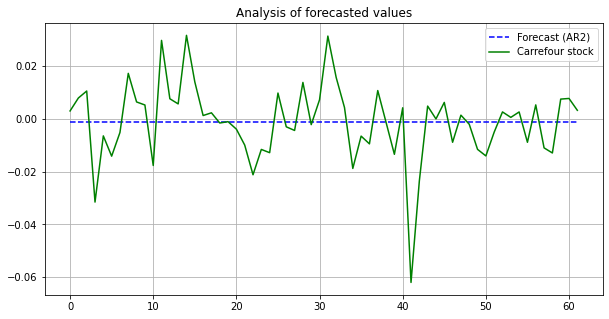

In [21]:
plt.figure(figsize=(10,5))
plt.plot(sel.fittedvalues, "--", label = "Forecast (AR2)", color="blue")
plt.plot(carrefour, label = "Carrefour stock", color="green")
plt.grid(True)
plt.legend()
plt.title("Analysis of forecasted values")

In [22]:
carrefour_df = yf.download('CA.PA', 
                      start='2019-01-01', 
                      end='2020-01-01', 
                      progress=False)

carrefour = pd.DataFrame(carrefour_df)
carrefour = carrefour["Close"]
carrefour = carrefour.dropna()
carrefour = carrefour.reset_index(drop=True)

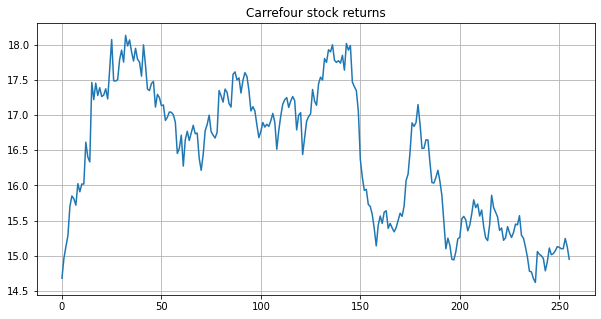

In [23]:
plt.figure(figsize=(10,5))
plt.plot(carrefour)
plt.title("Carrefour stock returns")
plt.grid(True)

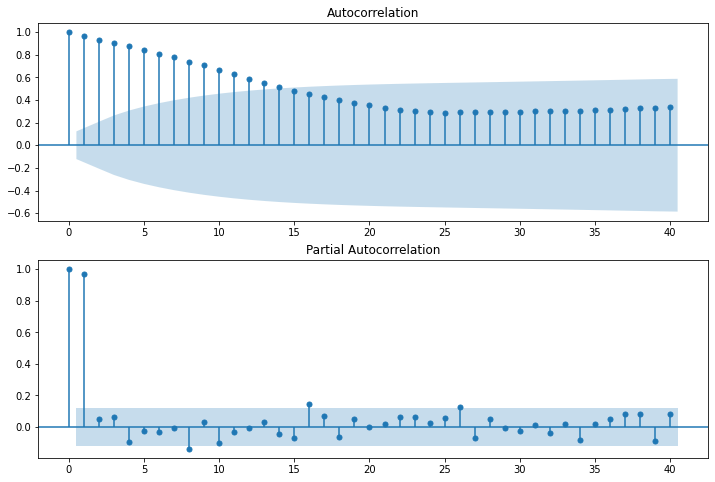

In [24]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(carrefour.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(carrefour, lags=40, ax=ax2)

In [25]:
sel = ar_select_order(carrefour, 10, old_names=False)
sel = sel.model.fit()
print(sel.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  256
Model:                     AutoReg(1)   Log Likelihood                  31.054
Method:               Conditional MLE   S.D. of innovations              0.214
Date:                Tue, 13 Oct 2020   AIC                             -3.058
Time:                        22:19:25   BIC                             -3.016
Sample:                             1   HQIC                            -3.041
                                  256                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4419      0.229      1.931      0.053      -0.007       0.890
Close.L1       0.9732      0.014     70.122      0.000       0.946       1.000
                                    Roots           

Text(0.5, 1.0, 'Analysis of forecasted values')

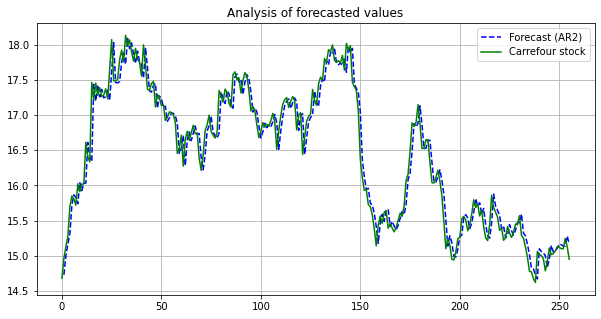

In [26]:
plt.figure(figsize=(10,5))
plt.plot(sel.fittedvalues, "--", label = "Forecast (AR2)", color="blue")
plt.plot(carrefour, label = "Carrefour stock", color="green")
plt.grid(True)
plt.legend()
plt.title("Analysis of forecasted values")

In [27]:
carrefour = pd.DataFrame(carrefour_df)
carrefour = carrefour["Close"].pct_change()
carrefour = np.log(1 + carrefour)
carrefour = carrefour.dropna()
carrefour = carrefour.reset_index(drop=True)

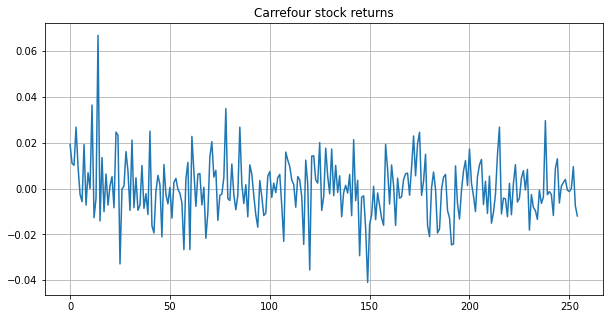

In [28]:
plt.figure(figsize=(10,5))
plt.plot(carrefour)
plt.title("Carrefour stock returns")
plt.grid(True)

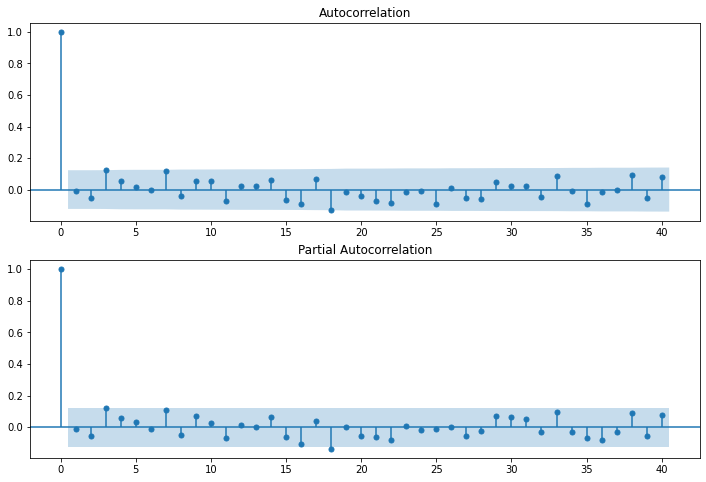

In [29]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(carrefour.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(carrefour, lags=40, ax=ax2)

In [30]:
sel = ar_select_order(carrefour, 10, old_names=False)
sel = sel.model.fit()
print(sel.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  255
Model:                     AutoReg(0)   Log Likelihood                 745.796
Method:               Conditional MLE   S.D. of innovations              0.013
Date:                Tue, 13 Oct 2020   AIC                             -8.672
Time:                        22:19:29   BIC                             -8.644
Sample:                             0   HQIC                            -8.660
                                  255                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.147e-05      0.001      0.088      0.930      -0.002       0.002


Text(0.5, 1.0, 'Analysis of forecasted values')

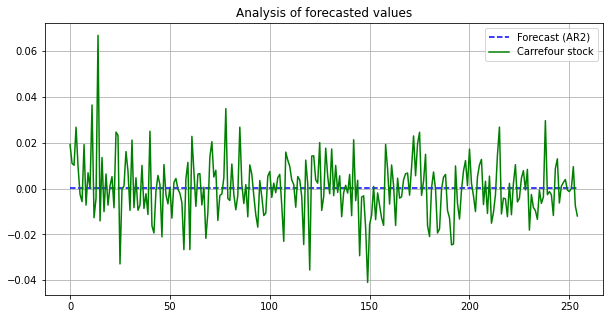

In [31]:
plt.figure(figsize=(10,5))
plt.plot(sel.fittedvalues, "--", label = "Forecast (AR2)", color="blue")
plt.plot(carrefour, label = "Carrefour stock", color="green")
plt.grid(True)
plt.legend()
plt.title("Analysis of forecasted values")

## Question 14
**Download 100 daily returns of two stocks A and B. Make optimal 1 and 5 days forecast for the two stocks with VAR models. Discuss modelling choices with AIC and BIC and discuss stationarity**

In [81]:
sanofi_df = yf.download('SAN', 
                      start='2019-01-01', 
                      end='2019-07-10', 
                      progress=False)

airbus_df = yf.download('AIR', 
                      start='2019-01-01', 
                      end='2019-07-10', 
                      progress=False)

sanofi = pd.DataFrame(sanofi_df)
sanofi = sanofi.rename(columns={"Close" : "sanofi"})
sanofi = sanofi["sanofi"].pct_change()
sanofi = np.log(1 + sanofi)
sanofi = sanofi.dropna()
sanofi = sanofi.reset_index(drop=True)

airbus = pd.DataFrame(airbus_df)
airbus = airbus.rename(columns={"Close" : "airbus"})
airbus = airbus["airbus"].pct_change()
airbus = np.log(1 + airbus)
airbus = airbus.dropna()
airbus = airbus.reset_index(drop=True)

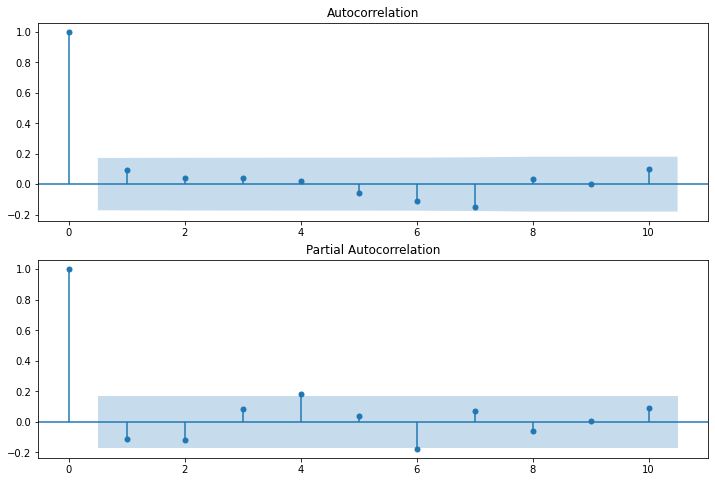

In [82]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sanofi.values.squeeze(), lags=10, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(airbus, lags=10, ax=ax2)

In [83]:
data = pd.concat([sanofi, airbus], axis=1)
data

,sanofi,airbus
0,0.006674,0.002942
1,0.008830,-0.021866
2,0.036681,0.025065
3,0.012632,0.012695
4,0.006256,0.025429
...,...,...
125,0.000000,0.010611
126,0.015168,0.012640
127,0.008565,0.013010
128,-0.015038,-0.006616


In [84]:
from statsmodels.tsa.api import VAR

In [89]:
model = VAR(data)
results = model.fit(1)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 13, Oct, 2020
Time:                     22:54:42
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.3487
Nobs:                     129.000    HQIC:                  -16.4277
Log likelihood:           702.987    FPE:                6.95138e-08
AIC:                     -16.4818    Det(Omega_mle):     6.63900e-08
--------------------------------------------------------------------
Results for equation sanofi
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.000100         0.001294            0.077           0.938
L1.sanofi         0.070656         0.096829            0.730           0.466
L1.airbus         0.038072         0.075002            0.508           0.61

In [90]:
model = VAR(data)
results = model.fit(2)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 13, Oct, 2020
Time:                     22:54:42
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.2301
Nobs:                     128.000    HQIC:                  -16.3624
Log likelihood:           699.739    FPE:                7.15521e-08
AIC:                     -16.4529    Det(Omega_mle):     6.62734e-08
--------------------------------------------------------------------
Results for equation sanofi
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.000017         0.001304            0.013           0.989
L1.sanofi         0.076539         0.098299            0.779           0.436
L1.airbus         0.026957         0.076201            0.354           0.72

In [91]:
model = VAR(data)
results = model.fit(3)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 13, Oct, 2020
Time:                     22:54:42
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.1274
Nobs:                     127.000    HQIC:                  -16.3136
Log likelihood:           697.590    FPE:                7.24235e-08
AIC:                     -16.4410    Det(Omega_mle):     6.50545e-08
--------------------------------------------------------------------
Results for equation sanofi
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.000268         0.001286           -0.209           0.835
L1.sanofi         0.055055         0.097619            0.564           0.573
L1.airbus         0.061705         0.076285            0.809           0.41

In [92]:
model = VAR(data)
results = model.fit(4)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 13, Oct, 2020
Time:                     22:54:42
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.0105
Nobs:                     126.000    HQIC:                  -16.2511
Log likelihood:           694.614    FPE:                7.42984e-08
AIC:                     -16.4157    Det(Omega_mle):     6.47222e-08
--------------------------------------------------------------------
Results for equation sanofi
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.000311         0.001295           -0.240           0.810
L1.sanofi         0.036084         0.100247            0.360           0.719
L1.airbus         0.054134         0.076770            0.705           0.48

In [93]:
model = VAR(data)
results = model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 13, Oct, 2020
Time:                     22:54:45
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -15.9062
Nobs:                     125.000    HQIC:                  -16.2018
Log likelihood:           692.515    FPE:                7.52019e-08
AIC:                     -16.4040    Det(Omega_mle):     6.35289e-08
--------------------------------------------------------------------
Results for equation sanofi
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -0.000352         0.001313           -0.268           0.789
L1.sanofi         0.028594         0.101787            0.281           0.779
L1.airbus         0.056595         0.078870            0.718           0.47

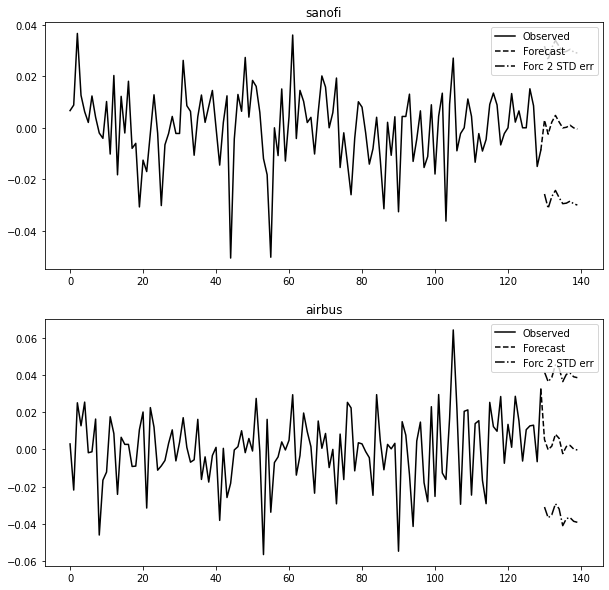

In [94]:
lag_order = results.k_ar
results.forecast(data.values[-lag_order:], 5)
results.plot_forecast(10)
plt.show()

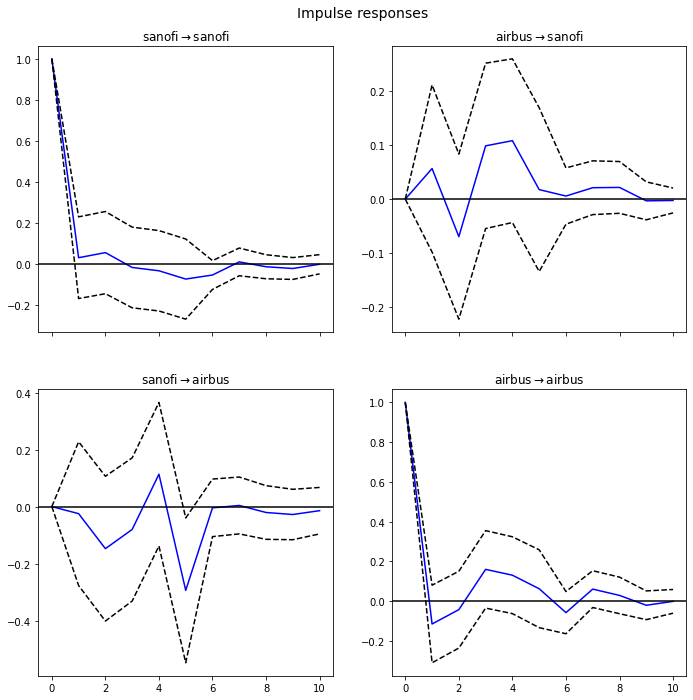

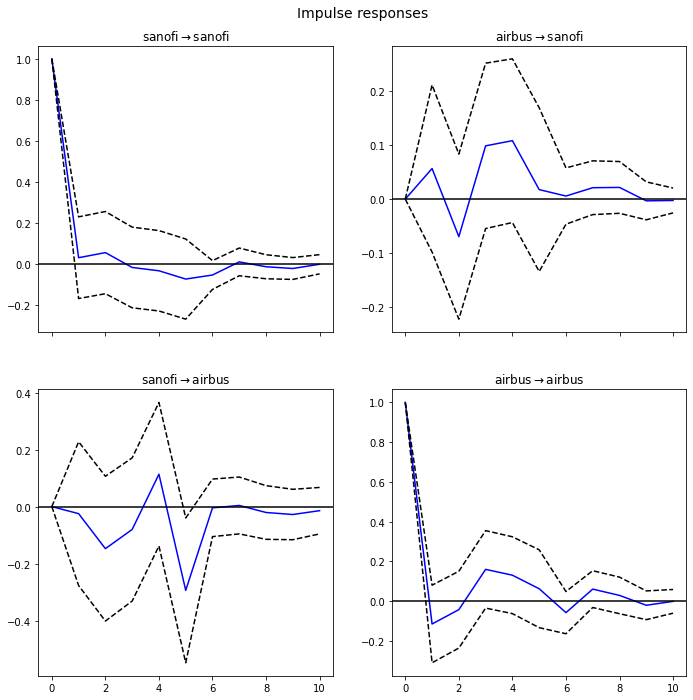

In [98]:
irf = results.irf(10)
irf.plot(orth=False)

In [209]:
carrefour_df = yf.download('CA.PA', 
                      start='2019-01-01', 
                      end='2019-01-10', 
                      progress=False)

sanofi_df = yf.download('SAN', 
                      start='2019-01-01', 
                      end='2019-01-10', 
                      progress=False)

airbus_df = yf.download('AIR', 
                      start='2019-01-01', 
                      end='2019-01-10', 
                      progress=False)

credit_agricole_df = yf.download('ACA', 
                      start='2019-01-01', 
                      end='2019-01-10', 
                      progress=False)

air_liquide_df = yf.download('AI', 
                      start='2019-01-01', 
                      end='2019-01-10', 
                      progress=False)

carrefour = pd.DataFrame(carrefour_df)
sanofi = pd.DataFrame(sanofi_df)
airbus = pd.DataFrame(airbus_df)
air_liquide = pd.DataFrame(air_liquide_df)
credit_agricole = pd.DataFrame(credit_agricole_df)

In [117]:
air_liquide

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,7.52,7.52,7.12,7.24,6.175004,643600
2019-01-02,7.14,7.39,6.92,7.31,6.234708,496600
2019-01-03,7.28,7.38,7.27,7.31,6.234708,497500
2019-01-04,7.35,7.65,7.35,7.61,6.490578,509300
2019-01-07,7.61,7.95,7.61,7.92,6.754978,484000
2019-01-08,8.00,8.07,7.88,8.00,6.823210,462500
2019-01-09,8.00,8.07,7.91,8.07,6.882912,434700
